In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import scipy.optimize as op

In [28]:
Temps = pd.read_hdf('calibration/Days14_15_jnc.hdf5')
Temps = Temps[Temps>0.] # Filter negative temperatures
log_Temps = np.log10(Temps) 
#log_mask = (log_Temps>2.)&(log_Temps<5.)
log_Temps = log_Temps[log_mask]# Filter high and low temperatures 
Temps

,2013-06-14-15-00-09,2013-06-14-15-00-20,2013-06-14-15-00-31,2013-06-14-15-01-27,2013-06-14-15-01-38,2013-06-14-15-01-49,2013-06-14-15-02-00,2013-06-14-15-02-11,2013-06-14-15-02-22,2013-06-14-15-02-34,...,2013-06-15-16-58-17,2013-06-15-16-58-28,2013-06-15-16-58-39,2013-06-15-16-58-50,2013-06-15-16-59-01,2013-06-15-16-59-12,2013-06-15-16-59-23,2013-06-15-16-59-35,2013-06-15-16-59-46,2013-06-15-16-59-57
50.003052,5.212229e+20,5.231640e+20,5.366238e+20,6.357777e+20,6.261823e+20,6.243874e+20,6.247824e+20,6.333490e+20,6.263440e+20,6.174598e+20,...,2.785688e+20,2.745634e+20,2.748042e+20,2.765321e+20,2.766487e+20,2.751603e+20,2.677599e+20,2.764384e+20,2.678066e+20,2.727525e+20
50.010681,5.012753e+20,5.155685e+20,5.201554e+20,6.161477e+20,6.226474e+20,6.218078e+20,6.184948e+20,6.371168e+20,6.222919e+20,6.182461e+20,...,2.824463e+20,2.762829e+20,2.776365e+20,2.734159e+20,2.789933e+20,2.755505e+20,2.746743e+20,2.762160e+20,2.706589e+20,2.705791e+20
50.018311,4.878010e+20,4.858358e+20,4.953484e+20,6.144960e+20,6.172997e+20,6.052813e+20,6.160777e+20,6.223127e+20,6.219345e+20,6.045629e+20,...,2.645418e+20,2.609164e+20,2.660738e+20,2.625833e+20,2.678879e+20,2.590976e+20,2.705064e+20,2.660873e+20,2.623855e+20,2.645130e+20
50.025940,4.779639e+20,4.695508e+20,4.849730e+20,6.137886e+20,6.182758e+20,6.050052e+20,6.261700e+20,6.001696e+20,6.027997e+20,6.010106e+20,...,2.600309e+20,2.628859e+20,2.608663e+20,2.577922e+20,2.570966e+20,2.585019e+20,2.604194e+20,2.547336e+20,2.558800e+20,2.587050e+20
50.033569,4.896646e+20,4.976183e+20,5.033480e+20,5.794107e+20,6.033152e+20,6.063582e+20,6.003295e+20,5.836044e+20,5.957961e+20,5.932331e+20,...,2.634815e+20,2.718297e+20,2.695581e+20,2.619971e+20,2.678846e+20,2.664157e+20,2.616651e+20,2.631725e+20,2.688284e+20,2.711668e+20
50.041199,5.388248e+20,5.567286e+20,5.528070e+20,5.798857e+20,5.967487e+20,6.178253e+20,5.865817e+20,6.043468e+20,6.101768e+20,6.061543e+20,...,2.675229e+20,2.648538e+20,2.716091e+20,2.689904e+20,2.718655e+20,2.629839e+20,2.636547e+20,2.679316e+20,2.699135e+20,2.707007e+20
50.048828,5.546121e+20,5.569798e+20,5.572362e+20,5.959997e+20,6.020401e+20,6.121181e+20,6.026083e+20,6.199913e+20,6.016479e+20,6.149354e+20,...,2.703202e+20,2.573096e+20,2.642385e+20,2.646659e+20,2.631860e+20,2.656713e+20,2.603199e+20,2.631245e+20,2.649669e+20,2.604347e+20
50.056458,5.320948e+20,5.325390e+20,5.307104e+20,5.735057e+20,5.901408e+20,5.959593e+20,5.832047e+20,5.939599e+20,5.669088e+20,5.903450e+20,...,2.649376e+20,2.608866e+20,2.608092e+20,2.581512e+20,2.592087e+20,2.662954e+20,2.577579e+20,2.630838e+20,2.617221e+20,2.639699e+20
50.064087,5.144506e+20,5.232590e+20,5.085122e+20,5.741869e+20,5.793567e+20,6.012421e+20,5.658956e+20,5.933870e+20,5.787433e+20,5.729941e+20,...,2.717024e+20,2.764788e+20,2.754733e+20,2.696207e+20,2.699502e+20,2.742584e+20,2.716423e+20,2.785092e+20,2.741510e+20,2.811687e+20
50.071716,4.838380e+20,4.739266e+20,4.615955e+20,5.796986e+20,5.771789e+20,5.829230e+20,5.813634e+20,5.881298e+20,5.897013e+20,5.596930e+20,...,2.774210e+20,2.798646e+20,2.824280e+20,2.758364e+20,2.777419e+20,2.785526e+20,2.796828e+20,2.797708e+20,2.758068e+20,2.813889e+20


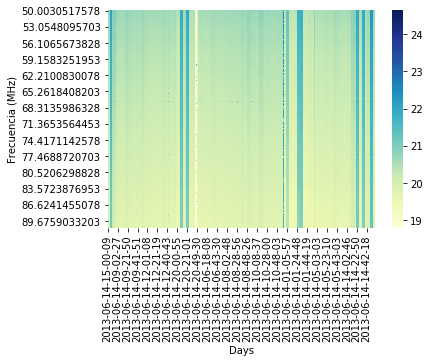

In [29]:
cols = Temps.columns.values
sb.heatmap(log_Temps[cols[0:2500]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[0],cols[2500]))


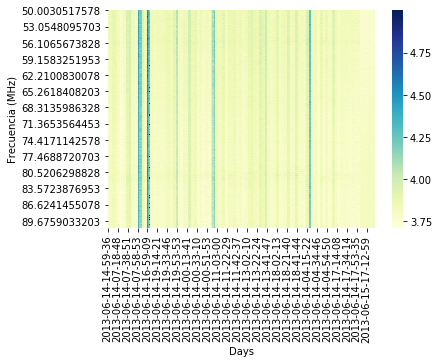

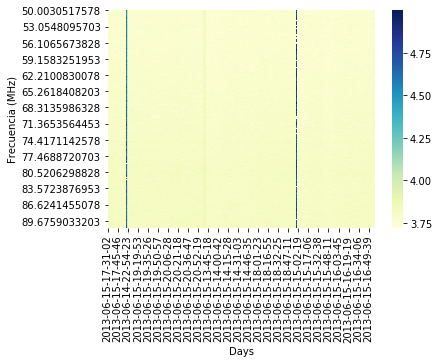

In [13]:
cols = Temps.columns.values
sb.heatmap(log_Temps[cols[2500:5000]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[2500],cols[5000]))
plt.show()

sb.heatmap(log_Temps[cols[5000:]], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%(cols[5000],cols[-1]))
plt.show()

Text(33,0.5,u'Frecuencia (MHz)')

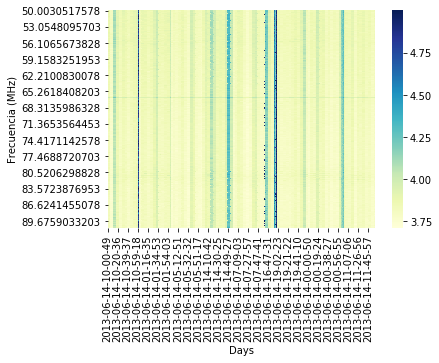

In [6]:
cols = Temps.columns.values
sb.heatmap(log_Temps.loc[:,'2013-06-14-10-00-49':'2013-06-14-13-00-30'], cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')

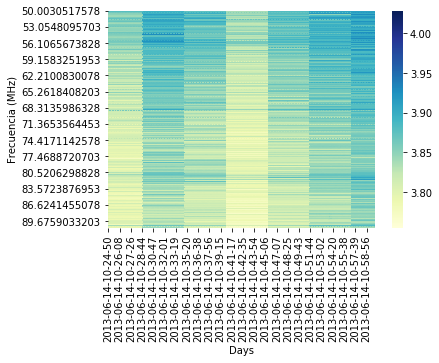

In [7]:
temp = Temps.loc[:,'2013-06-14-10-24-50':'2013-06-14-10-59-52']
data = temp.values
sb.heatmap(np.log10(temp), cmap='YlGnBu', yticklabels=400)
plt.xlabel('Days')
plt.ylabel('Frecuencia (MHz)')
plt.savefig('Imagenes/Data_%s_%s.png'%('2013-06-14-10-24-50','2013-06-14-10-59-52'))
index = Temps.index.values

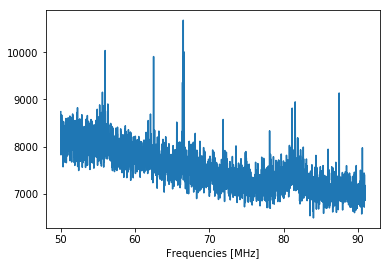

In [25]:
plt.plot(index,data[:,0])
plt.xlabel('Frequencies [MHz]')
plt.show()

In [10]:
data_gsm =  pd.read_hdf('calibration/Tgsm.hdf5')
data_reduce = data_gsm.loc[:,'2013-06-14 10:30:00.000':'2013-06-14 11:00:00.000']
T_gsm = data_reduce.values
freqs = data_reduce.index.values
np.shape(T_gsm)

(41, 7)

In [ ]:
# Data binnig
freq_bins = []
for f in freqs:
    mask = (index>=f)&(index<f+1)
    freq_bins.append(np.mean(temp[mask]))
Temp_binfreq = np.array(freq_bins)

bins = int(np.shape(Temp_binfreq)[1]/25. +1) # Data binning in time, 25 is because every 25 data is 5 mins (Aprox 12 secs between data)
T_meas = np.zeros(np.shape(T_gsm))
T_std = np.zeros(np.shape(T_gsm))
for i in range(bins):
    T_meas[:,i] = np.mean(Temp_binfreq[:,i:i+25], axis =1)
    T_std[:,i] = np.std(Temp_binfreq[:,i:i+25], axis =1)

In [ ]:
plt.plot(freqs,np.mean(T_meas,axis=1), '.k')
plt.plot(freqs,np.mean(T_meas,axis=1),'r')
plt.xlabel('Frequencies [MHz]')
plt.savefig('Uncalibrated.png')

In [ ]:
def Chisq(logk,Tmeas,Tgsm):
    Chi = (logk + np.log10(Tmeas) - np.log10(Tgsm))**2
    return sum(Chi)

fun = lambda *args: Chisq(*args)

In [ ]:
logK = np.zeros(len(freqs))
for i in range(len(freqs)):
    logK[i] = op.minimize(fun,1,args=(T_meas[i,:],T_gsm[i,:])).x[0] 

In [ ]:
K_nu = 10.**logK

In [ ]:
plt.semilogy(freqs,K_nu,'o')
plt.xlabel('Frequencies [MHz]')
plt.ylabel(r'$K(\nu)$')
plt.savefig('K_nu.png')

In [ ]:
Tgsm_mean = np.mean(T_gsm,axis=1)
Tmeas_mean = np.mean(T_meas,axis=1)

plt.plot(freqs,Tgsm_mean, 'r',label=r'$T_{gsm}$')
plt.plot(freqs,K_nu*Tmeas_mean,'.k', label = 'Calibrated Data')
plt.xlabel('Frequencies [MHz]')
plt.ylabel('Temperature [Kelvin]')
plt.legend()
plt.savefig('calibrated.png')

In [ ]:
plt.plot(freqs,K_nu*Tmeas_mean - Tgsm_mean,'.-k')
plt.xlabel('Frequencies [MHz]')
plt.ylabel(r'$K(\nu)T_{measure}-T_{gsm}$')
plt.savefig('KTmeas-Tgsm.png')